In [11]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import time
import requests
import json
import statistics

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from twit_api import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [12]:
# Target Account
target_users = ['@tesla', '@HMNYHQ1', '@tim_cook']

all_user_list = []
all_compound_list = []
all_pos_list = []
all_neu_list = []
all_neg_list = []
all_sentiment_list = []
tsla_com_list=[]
tsla_pos_list=[]
tsla_neg_list=[]
tsla_neu_list=[]
appl_com_list=[]
appl_pos_list=[]
appl_neg_list=[]
appl_neu_list=[]
hmny_com_list=[]
hmny_pos_list=[]
hmny_neg_list=[]
hmny_neu_list=[]

# Loop through all targer terms
for target_user in target_users:
    

    # Variables for holding sentiments
    user_list = []
    compound_list = []
    pos_list = []
    neu_list = []
    neg_list = []


    for x in range(5):
        public_tweets = api.user_timeline(target_user, page=x)

        for tweet in public_tweets:

            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            user_list.append(tweet["user"]["screen_name"])
            

            compound_list.append(compound)
            pos_list.append(pos)
            neu_list.append(neu)
            neg_list.append(neg)
          
            if target_user==target_users[0]:
                tsla_com_list.append(compound)
                tsla_pos_list.append(pos)
                tsla_neg_list.append(neg)
                tsla_neu_list.append(neu)
            elif target_user==target_users[1]:
                hmny_com_list.append(compound)
                hmny_pos_list.append(pos)
                hmny_neg_list.append(neg)
                hmny_neu_list.append(neu)
            elif target_user==target_users[2]:
                appl_com_list.append(compound)
                appl_pos_list.append(pos)
                appl_neg_list.append(neg)
                appl_neu_list.append(neu)
            else:
                print('error')
    all_user_list.append(user_list)
    all_compound_list.append(compound_list)
    all_pos_list.append(pos_list)
    all_neu_list.append(neu_list)
    all_neg_list.append(neg_list)

            
        
    sentiments = np.mean(compound_list)
    all_sentiment_list.append(sentiments)

In [13]:
all_user_list = np.array(all_user_list).flatten().tolist()
all_compound_list = np.array(all_compound_list).flatten().tolist()
all_pos_list = np.array(all_pos_list).flatten().tolist()
all_neu_list = np.array(all_neu_list).flatten().tolist()
all_neg_list = np.array(all_neg_list).flatten().tolist()


sentiment = {'User': all_user_list,'Compound_Score': np.mean(all_compound_list), 'Pos_Score': np.mean(all_pos_list), 'Neu_Score': np.mean(all_neu_list), 'Neg_Score': np.mean(all_neg_list)}
sentiment_df = pd.DataFrame(sentiment)
#sentiment_df.to_csv("Sentiment Analysis.csv", index=False, header=True)
sentiment_df

,User,Compound_Score,Pos_Score,Neu_Score,Neg_Score
0,Tesla,0.259185,0.149297,0.827547,0.023157
1,Tesla,0.259185,0.149297,0.827547,0.023157
2,Tesla,0.259185,0.149297,0.827547,0.023157
3,Tesla,0.259185,0.149297,0.827547,0.023157
4,Tesla,0.259185,0.149297,0.827547,0.023157
5,Tesla,0.259185,0.149297,0.827547,0.023157
6,Tesla,0.259185,0.149297,0.827547,0.023157
7,Tesla,0.259185,0.149297,0.827547,0.023157
8,Tesla,0.259185,0.149297,0.827547,0.023157
9,Tesla,0.259185,0.149297,0.827547,0.023157


In [14]:
tesla = {
        "User": "Tesla",
        "Compound": np.mean(tsla_com_list),
        "Positive": np.mean(tsla_pos_list),
        "Neutral": np.mean(tsla_neg_list),
        "Negative": np.mean(tsla_neu_list)
    }
apple = {
        "User": "Apple",
        "Compound": np.mean(appl_com_list),
        "Positive": np.mean(appl_pos_list),
        "Neutral": np.mean(appl_neg_list),
        "Negative": np.mean(appl_neu_list)
    }
hmny = {
        "User": "HMNY",
        "Compound": np.mean(hmny_com_list),
        "Positive": np.mean(hmny_pos_list),
        "Neutral": np.mean(hmny_neg_list),
        "Negative": np.mean(hmny_neu_list)
    }
print(tesla,
      apple,
      hmny)

{'User': 'Tesla', 'Compound': 0.13307999999999998, 'Positive': 0.09315, 'Neutral': 0.023280000000000002, 'Negative': 0.88357} {'User': 'Apple', 'Compound': 0.479769, 'Positive': 0.23851, 'Neutral': 0.027290000000000002, 'Negative': 0.7341900000000001} {'User': 'HMNY', 'Compound': 0.16470700000000005, 'Positive': 0.11623, 'Neutral': 0.0189, 'Negative': 0.86488}


In [15]:
if tesla['Neutral']> tesla['Positive'] and tesla['Negative']:
    tsla_twit_outcome= "Neutral"
elif tesla['Positive']>tesla['Negative']:
    tsla_twit_outcome= "Positive"
else:
    tsla_twit_outcome= "Negative"
#tsla_twit_outcome

if apple['Neutral']> apple['Positive'] and apple['Negative']:
    appl_twit_outcome= "Neutral"
elif apple['Positive']>apple['Negative']:
    appl_twit_outcome= "Positive"
else:
    appl_twit_outcome= "Negative"
#appl_twit_outcome
if hmny['Neutral']> hmny['Positive'] and hmny['Negative']:
    hmny_twit_outcome= "Neutral"
elif hmny['Positive']>hmny['Negative']:
    hmny_twit_outcome= "Positive"
else:
    hmny_twit_outcome= "Negative"

In [16]:
tsla_twit_feedback=[]
#if  +,-, or = then add subtract the difference to the tsla twit feedback to adjust the results
#add a check so it checks yesterdays prediction to today but doesnt duplicate.


In [17]:
# URL for GET requests to retrieve vehicle data
ticker = ["AAPL","TSLA","HMNY"]

url = "https://api.iextrading.com/1.0/stock/"
duration = "/chart/3m"

In [18]:

#7 day moving average

week_counter = 0 
avg_counter = 0
series1 = 10
series2 = 7
count = 0  
moving_avg =[]
company = []

for i in ticker:
    
    response = requests.get(url+i+duration).json()
    print(i)
    count = 0
    
    for x in range(series1):

            close = []
            
            for y in range(series2):
                try:
                    close.append(response[count]['close'])
                    #print(close)
                    count = count +1

                except:
                    print("No value")    
                    
            print(close) 
            avg = statistics.mean(close)
            
            company.append(i)
            moving_avg.append(avg)

            #zip(company, moving_avg)

print("Ticker and Moving Average")
for c, m in zip(company, moving_avg):  
    print(f'{c} {m}')        
    #print(moving_avg)

AAPL
[189.9139, 189.6847, 187.2234, 190.3623, 190.6613, 190.2428, 190.7809]
[189.7346, 191.2094, 190.7709, 190.9403, 192.3255, 194.1391, 193.5312]
[190.3125, 189.2463, 189.6249, 200.7958, 206.6652, 207.2631, 208.3393]
[206.3862, 206.5257, 208.15, 207.53, 208.87, 209.75, 210.24]
[213.32, 217.58, 215.46, 215.04, 215.05, 215.49, 216.16]
[217.94, 219.7, 222.98, 225.03, 227.63, 228.36, 226.87]
[223.1, 221.3, 218.33, 223.85, 221.07, 226.41, 223.84]
[217.88, 218.24, 218.37, 220.03, 217.66, 220.79, 222.19]
[220.42, 224.95, 225.74, 227.26, 229.28, 232.07, 227.99]
No value
No value
No value
No value
[224.29, 223.77, 226.87]
TSLA
[318.51, 322.47, 318.96, 316.71, 318.87, 310.1, 322.69]
[323.85, 320.23, 313.58, 303.2, 297.43, 308.74, 306.65]
[297.18, 290.17, 298.14, 300.84, 349.54, 348.17, 341.99]
[379.57, 370.34, 352.45, 355.49, 356.41, 347.64, 338.69]
[335.45, 305.5, 308.44, 321.9, 321.64, 320.1, 322.82]
[319.27, 311.86, 305.01, 303.15, 301.66, 288.95, 280.74]
[280.95, 263.24, 285.5, 279.44, 290.

In [19]:
#create data frame from API call
summary = pd.DataFrame({"Ticker": company,
                      "Moving Average": moving_avg})
summary

,Ticker,Moving Average
0,AAPL,189.838471
1,AAPL,191.807286
2,AAPL,198.892443
3,AAPL,208.207414
4,AAPL,215.442857
5,AAPL,224.072857
6,AAPL,222.557143
7,AAPL,219.308571
8,AAPL,226.815714
9,AAPL,224.976667


In [20]:
#create dataframe and reset index to grpah
AAPL = summary.loc[(summary["Ticker"] == "AAPL")]
AAPL = AAPL.reset_index(drop=True)

TSLA = summary.loc[(summary["Ticker"] == "TSLA")]
TSLA = TSLA.reset_index(drop=True)

HMNY = summary.loc[(summary["Ticker"] == "HMNY")]
HMNY = HMNY.reset_index(drop=True)

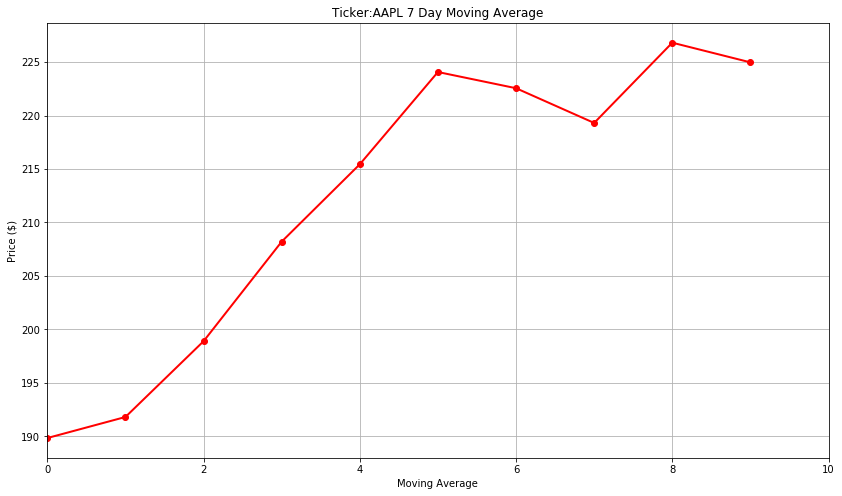

In [21]:
#Graph AAPL 
#graph properties
plt.xlabel("Moving Average")
plt.ylabel("Price ($)")
plt.title(f"Ticker:AAPL 7 Day Moving Average")
plt.grid()

#graph
plt.rcParams["figure.figsize"] = [14,8]
plt.xlim([0,series1])
plt.plot(AAPL["Moving Average"], marker="o", color="red", linewidth=2)
plt.show()

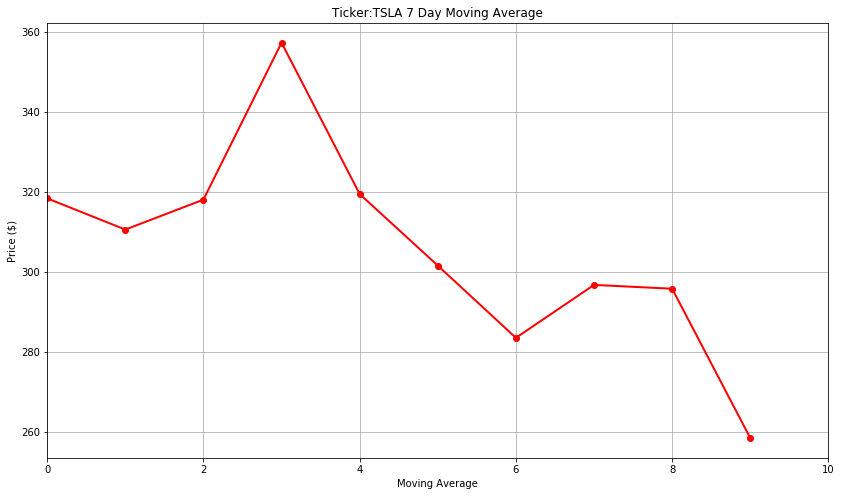

In [22]:
#Graph TSLA
#graph properties
plt.xlabel("Moving Average")
plt.ylabel("Price ($)")
plt.title(f"Ticker:TSLA 7 Day Moving Average")
plt.grid()

#graph
plt.rcParams["figure.figsize"] = [14,8]
plt.xlim([0,series1])
plt.plot(TSLA["Moving Average"], marker="o", color="red", linewidth=2)
plt.show()

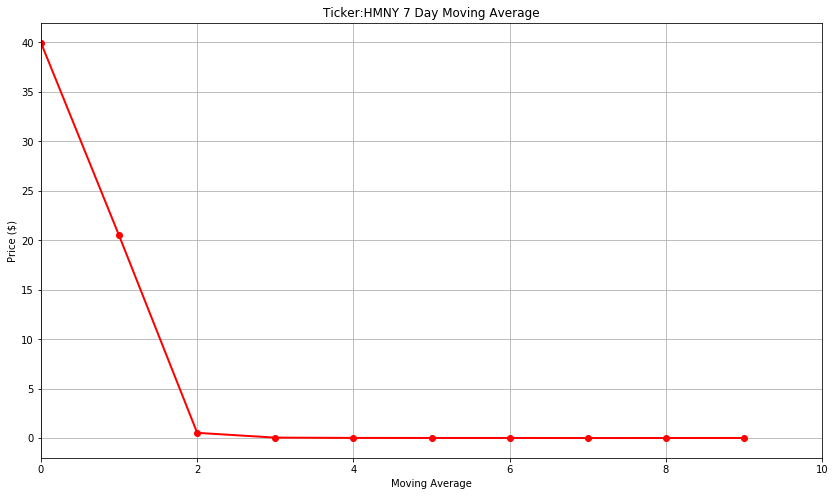

In [23]:
#Graph HMNY
#graph properties
plt.xlabel("Moving Average")
plt.ylabel("Price ($)")
plt.title(f"Ticker:HMNY 7 Day Moving Average")
plt.grid()

#graph
plt.rcParams["figure.figsize"] = [14,8]
plt.xlim([0,series1])
plt.plot(HMNY["Moving Average"], marker="o", color="red", linewidth=2)
plt.show()